In [23]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load stock data (example: CSV file with historical stock data)
# The dataset should have features like 'Open', 'High', 'Low', 'Close', 'Volume', etc.
dataGold = pd.read_csv('./CSV/df_gold.csv')
dataSP500 = pd.read_csv('./CSV/df_sp500.csv')
dataBTC = pd.read_csv('./CSV/df_btc.csv')


#Create target variable: 1 if the price will go up, 0 if it will go down
dataGold['Price_Up'] = np.where(dataGold['Close'].shift(-1) > dataGold['Close'], 1, 0)

dataSP500['Price_Up'] = np.where(dataSP500['Close'].shift(-1) > dataSP500['Close'], 1, 0)

dataBTC['Price_Up'] = np.where(dataBTC['Close'].shift(-1) > dataBTC['Close'], 1, 0)

#Date,Close,High,Low,Open,Volume
# Select features for the model (e.g., 'Open', 'High', 'Low', 'Close', 'Volume')
features = ['Close', 'Open', 'Volume', 'High', 'Low']

Xgold = dataGold[features]
ygold = dataGold['Price_Up']

Xsp500 = dataSP500[features]
ysp500 = dataSP500['Price_Up']

Xbtc = dataBTC[features]
ybtc = dataBTC['Price_Up']

X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(Xgold, ygold, test_size=0.5, random_state=42)

X_train_sp500, X_test_sp500, y_train_sp500, y_test_sp500 = train_test_split(Xsp500, ysp500, test_size=0.5, random_state=42)

X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(Xbtc, ybtc, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()

X_train_scaled_gold = scaler.fit_transform(X_train_gold)
X_test_scaled_gold = scaler.transform(X_test_gold)

X_train_scaled_sp500 = scaler.fit_transform(X_train_sp500)
X_test_scaled_sp500 = scaler.transform(X_test_sp500)

X_train_scaled_btc = scaler.fit_transform(X_train_btc)
X_test_scaled_btc = scaler.transform(X_test_btc)

# Train the logistic regression model
model_gold = LogisticRegression()
model_sp500 = LogisticRegression()
model_btc = LogisticRegression()

model_gold.fit(X_train_scaled_gold, y_train_gold)
model_sp500.fit(X_train_scaled_sp500, y_train_sp500)
model_btc.fit(X_train_scaled_btc, y_train_btc)


# Make predictions on the test set
y_pred_gold = model_gold.predict(X_test_scaled_gold)
y_pred_sp500 = model_sp500.predict(X_test_scaled_sp500)
y_pred_btc = model_btc.predict(X_test_scaled_btc)

# Evaluate the model
accuracy_gold = accuracy_score(y_test_gold, y_pred_gold)
conf_matrix_gold = confusion_matrix(y_test_gold, y_pred_gold)

accuracy_sp500 = accuracy_score(y_test_sp500, y_pred_sp500)
conf_matrix_sp500 = confusion_matrix(y_test_sp500, y_pred_sp500)

accuracy_btc = accuracy_score(y_test_btc, y_pred_btc)
conf_matrix_btc = confusion_matrix(y_test_btc, y_pred_btc)


# Display results
print(f'Accuracy: {accuracy_gold * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix_gold)

print(f'Accuracy: {accuracy_sp500 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix_sp500)

print(f'Accuracy: {accuracy_btc * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix_btc)



Accuracy: 51.90%
Confusion Matrix:
[[  3 291]
 [ 12 324]]
Accuracy: 53.26%
Confusion Matrix:
[[ 25 264]
 [ 30 310]]
Accuracy: 50.11%
Confusion Matrix:
[[320 110]
 [346 138]]


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import ta  # Pour les indicateurs techniques

def add_technical_indicators(df):
    # Ajout des indicateurs techniques
    df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()
    df['MACD'] = ta.trend.MACD(df['Close']).macd()
    df['BB_upper'] = ta.volatility.BollingerBands(df['Close']).bollinger_hband()
    df['BB_lower'] = ta.volatility.BollingerBands(df['Close']).bollinger_lband()
    df['MA20'] = ta.trend.SMAIndicator(df['Close'], window=20).sma_indicator()
    return df

def prepare_data(df):
    # Ajout des indicateurs techniques
    df = add_technical_indicators(df)
    
    # Création de la variable cible
    df['Price_Up'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
    
    # Features avancées
    features = ['Close', 'Open', 'Volume', 'High', 'Low', 
               'RSI', 'MACD', 'BB_upper', 'BB_lower', 'MA20']
    
    # Suppression des lignes avec valeurs manquantes
    df = df.dropna()
    
    return df[features], df['Price_Up']

# Préparation des données
for data, name in [(dataGold, 'Gold'), (dataSP500, 'SP500'), (dataBTC, 'BTC')]:
    # Préparation
    X, y = prepare_data(data)
    
    # Split avec 80% training, 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardisation avec un nouveau scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modèle avec régularisation
    model = LogisticRegression(C=0.1, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test_scaled)
    
    # Évaluation
    print(f"\nRésultats pour {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred))


Résultats pour Gold:
Accuracy: 0.57

Rapport de classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.57      1.00      0.73       141

    accuracy                           0.57       247
   macro avg       0.29      0.50      0.36       247
weighted avg       0.33      0.57      0.41       247


Résultats pour SP500:
Accuracy: 0.53

Rapport de classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.53      1.00      0.69       131

    accuracy                           0.53       247
   macro avg       0.27      0.50      0.35       247
weighted avg       0.28      0.53      0.37       247


Résultats pour BTC:
Accuracy: 0.49

Rapport de classification:
              precision    recall  f1-score   support

           0       0.48      0.23      0.31       180
           1       0.49      0.75      0.6

C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati


=== Résultats pour Or ===


Précision: 55.56%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.56      1.00      0.71       135

    accuracy                           0.56       243
   macro avg       0.28      0.50      0.36       243
weighted avg       0.31      0.56      0.40       243



C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

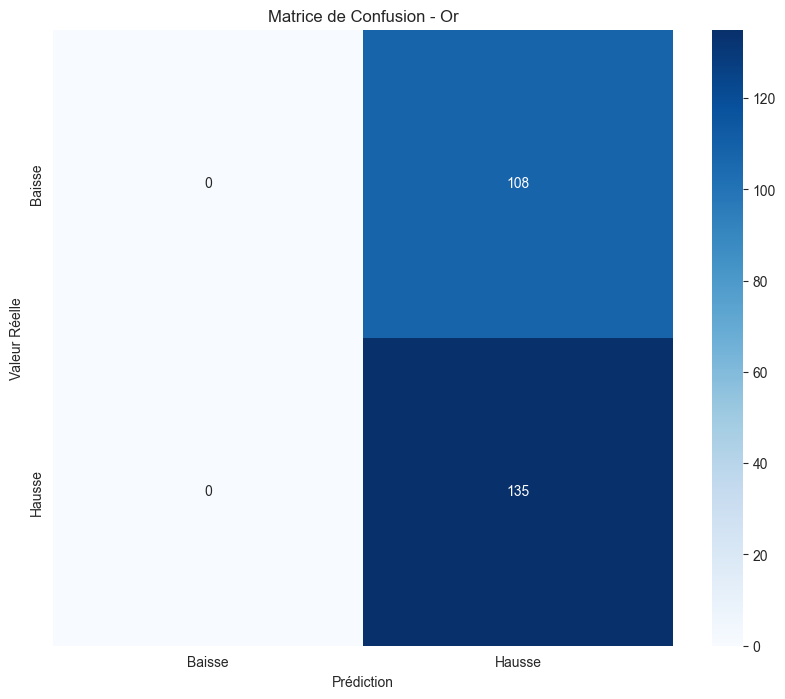


=== Résultats pour S&P500 ===
Précision: 52.89%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.53      1.00      0.69       128

    accuracy                           0.53       242
   macro avg       0.26      0.50      0.35       242
weighted avg       0.28      0.53      0.37       242



C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

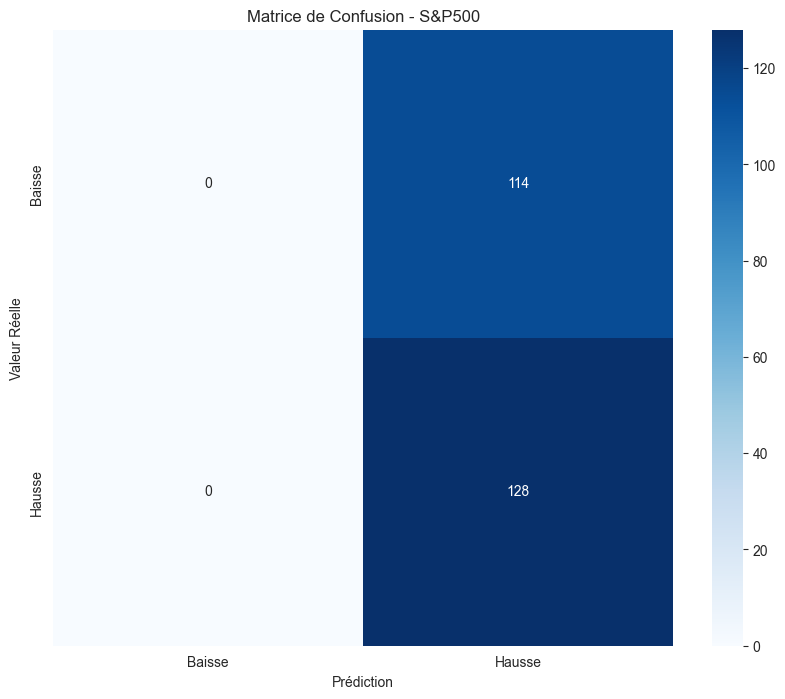


=== Résultats pour Bitcoin ===
Précision: 53.09%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.50      0.35      0.41       167
           1       0.55      0.69      0.61       189

    accuracy                           0.53       356
   macro avg       0.52      0.52      0.51       356
weighted avg       0.52      0.53      0.52       356



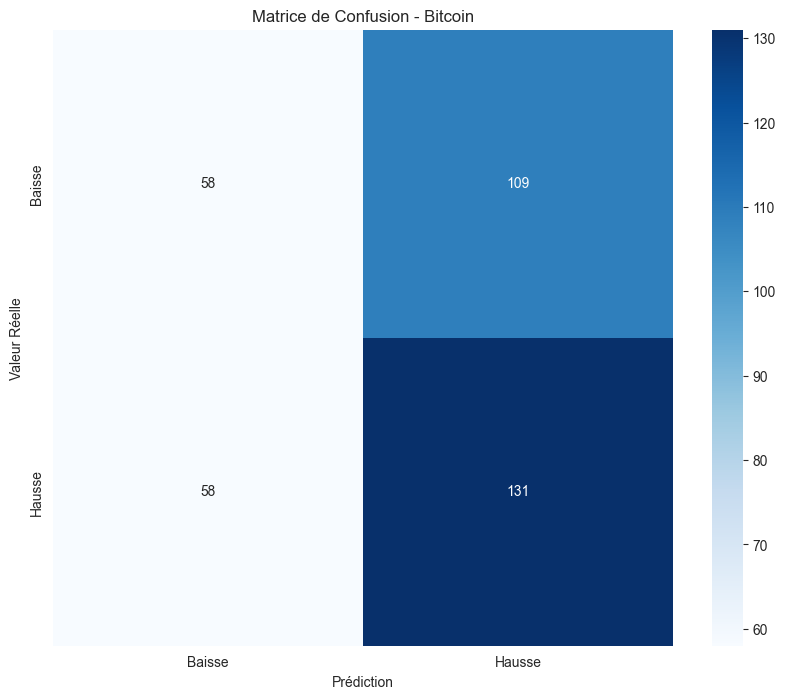

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ta

# Configuration correcte du style des graphiques
plt.style.use('default')  # Style matplotlib par défaut
sns.set_style("whitegrid")  # Style seaborn

def add_technical_indicators(df):
    """Ajoute les indicateurs techniques au DataFrame."""
    df = df.copy()
    df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()
    df['MACD'] = ta.trend.MACD(df['Close']).macd()
    df['BB_upper'] = ta.volatility.BollingerBands(df['Close']).bollinger_hband()
    df['BB_lower'] = ta.volatility.BollingerBands(df['Close']).bollinger_lband()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    return df


def prepare_dataset(csv_path, name):
    """Prépare le dataset pour l'entraînement."""
    # Chargement des données
    df = pd.read_csv(csv_path)
    
    # Ajout des indicateurs techniques
    df = add_technical_indicators(df)
    
    # Création de la variable cible
    df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
    
    # Sélection des features
    features = ['Close', 'Open', 'High', 'Low', 'Volume',
               'RSI', 'MACD', 'BB_upper', 'BB_lower', 'MA20', 'MA50']
    
    # Nettoyage des données
    df = df.dropna()
    
    return df[features], df['Target'], name

def plot_confusion_matrix(y_true, y_pred, title):
    """Affiche la matrice de confusion."""
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Baisse', 'Hausse'],
                yticklabels=['Baisse', 'Hausse'])
    plt.title(f'Matrice de Confusion - {title}')
    plt.ylabel('Valeur Réelle')
    plt.xlabel('Prédiction')
    plt.show()

def train_and_evaluate_model(X, y, name):
    """Entraîne et évalue le modèle."""
    # Split des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entraînement du modèle
    model = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test_scaled)
    
    # Évaluation
    print(f"\n=== Résultats pour {name} ===")
    print(f"Précision: {accuracy_score(y_test, y_pred):.2%}")
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred))
    
    # Affichage de la matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)
    
    return model, scaler

def main():
    # Définition des chemins des fichiers
    datasets = [
        ('./CSV/df_gold.csv', 'Or'),
        ('./CSV/df_sp500.csv', 'S&P500'),
        ('./CSV/df_btc.csv', 'Bitcoin')
    ]
    
    # Traitement de chaque actif
    for csv_path, name in datasets:
        X, y, name = prepare_dataset(csv_path, name)
        model, scaler = train_and_evaluate_model(X, y, name)

if __name__ == "__main__":
    main()


=== Résultats de la validation croisée pour Or ===
Scores par fold: [0.55154639 0.57731959 0.53092784 0.47150259 0.58031088]
Score moyen: 0.542 (+/- 0.079)

Évaluation finale sur l'ensemble de test pour Or:
Précision: 55.56%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.56      1.00      0.71       135

    accuracy                           0.56       243
   macro avg       0.28      0.50      0.36       243
weighted avg       0.31      0.56      0.40       243



C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

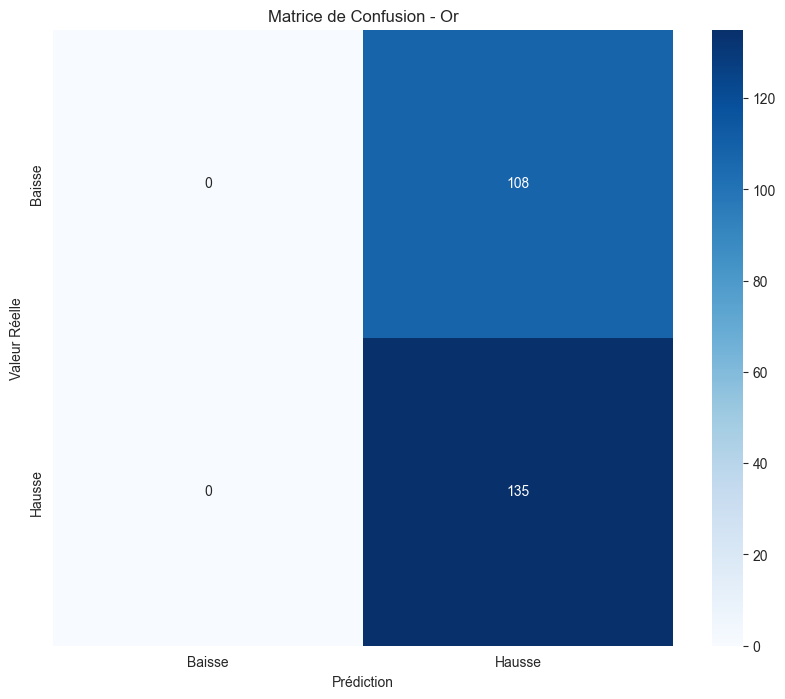


=== Résultats de la validation croisée pour S&P500 ===
Scores par fold: [0.55154639 0.50259067 0.50259067 0.5388601  0.55958549]
Score moyen: 0.531 (+/- 0.048)

Évaluation finale sur l'ensemble de test pour S&P500:
Précision: 52.89%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.53      1.00      0.69       128

    accuracy                           0.53       242
   macro avg       0.26      0.50      0.35       242
weighted avg       0.28      0.53      0.37       242



C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

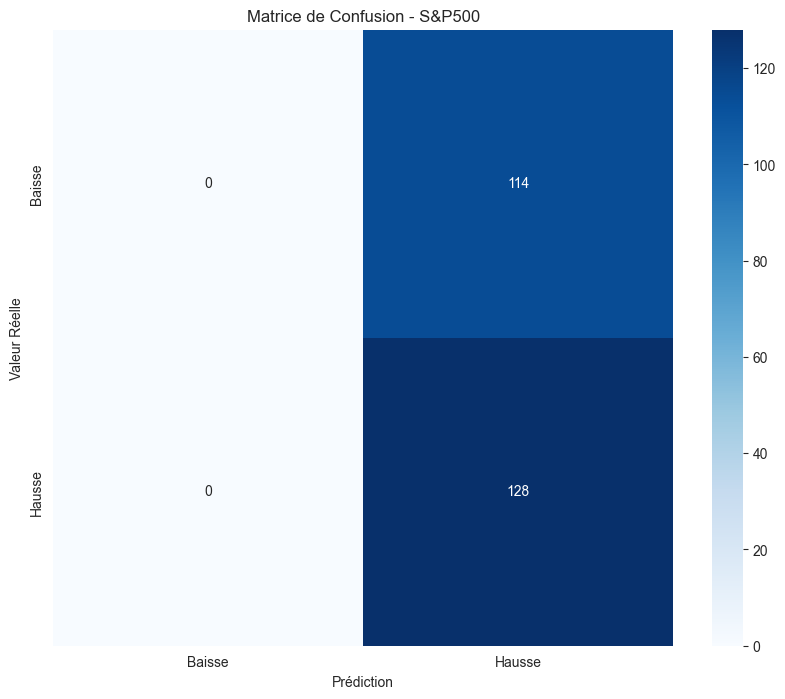


=== Résultats de la validation croisée pour Bitcoin ===
Scores par fold: [0.4877193  0.47719298 0.50526316 0.46126761 0.46830986]
Score moyen: 0.480 (+/- 0.031)

Évaluation finale sur l'ensemble de test pour Bitcoin:
Précision: 53.09%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.50      0.35      0.41       167
           1       0.55      0.69      0.61       189

    accuracy                           0.53       356
   macro avg       0.52      0.52      0.51       356
weighted avg       0.52      0.53      0.52       356



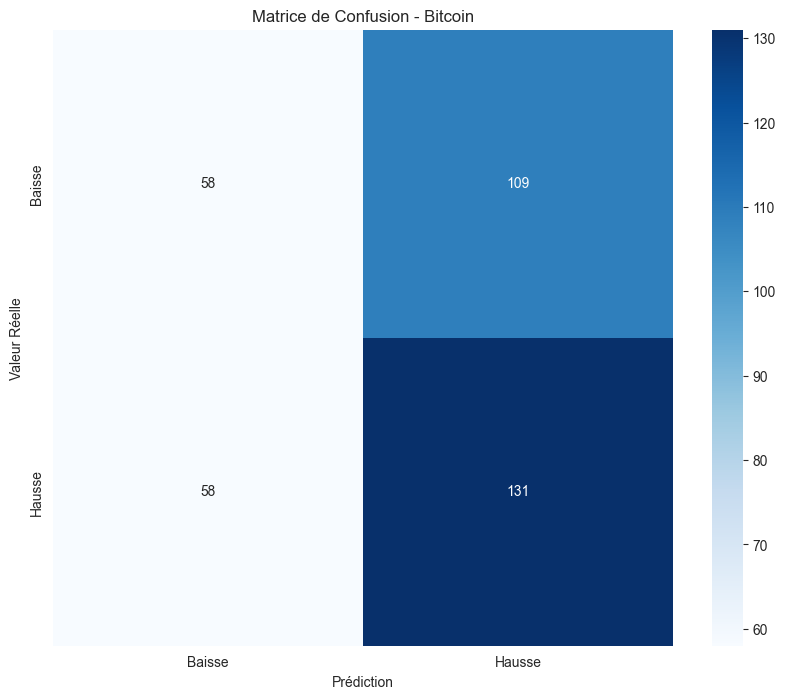

C:\Users\Jules\AppData\Local\Temp\ipykernel_47588\2537174577.py:111: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_results[name] for name in cv_results.keys()], labels=cv_results.keys())


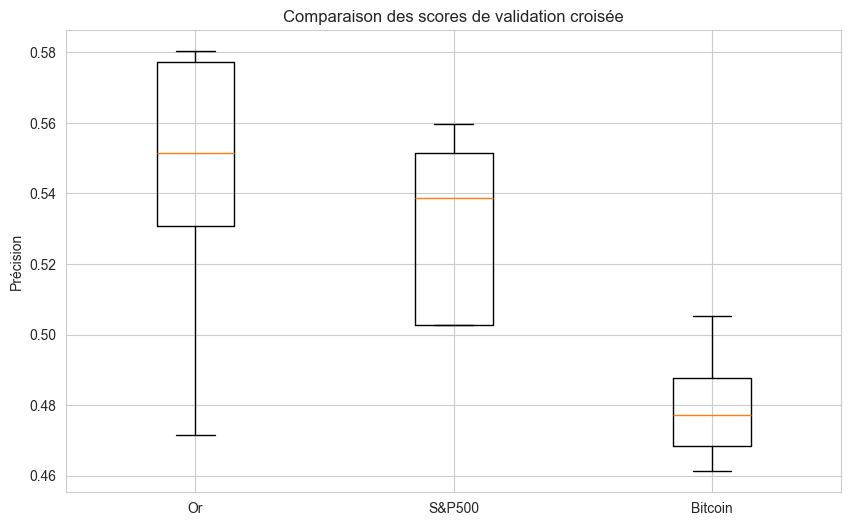

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ta

def add_technical_indicators(df):
    """Ajoute les indicateurs techniques au DataFrame."""
    df = df.copy()
    df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()
    df['MACD'] = ta.trend.MACD(df['Close']).macd()
    df['BB_upper'] = ta.volatility.BollingerBands(df['Close']).bollinger_hband()
    df['BB_lower'] = ta.volatility.BollingerBands(df['Close']).bollinger_lband()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    return df

def prepare_dataset(csv_path, name):
    """Prépare le dataset pour l'entraînement."""
    df = pd.read_csv(csv_path)
    df = add_technical_indicators(df)
    df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
    
    features = ['Close', 'Open', 'High', 'Low', 'Volume',
               'RSI', 'MACD', 'BB_upper', 'BB_lower', 'MA20', 'MA50']
    
    df = df.dropna()
    return df[features], df['Target'], name

def plot_confusion_matrix(y_true, y_pred, title):
    """Affiche la matrice de confusion."""
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Baisse', 'Hausse'],
                yticklabels=['Baisse', 'Hausse'])
    plt.title(f'Matrice de Confusion - {title}')
    plt.ylabel('Valeur Réelle')
    plt.xlabel('Prédiction')
    plt.show()

def perform_cross_validation(X, y, name, n_splits=5):
    """Effectue la validation croisée."""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
    
    # Configuration de la validation croisée
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Calcul des scores de validation croisée
    cv_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    
    print(f"\n=== Résultats de la validation croisée pour {name} ===")
    print(f"Scores par fold: {cv_scores}")
    print(f"Score moyen: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    return cv_scores

def train_and_evaluate_model(X, y, name):
    """Entraîne et évalue le modèle avec validation croisée."""
    # Split des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Validation croisée
    cv_scores = perform_cross_validation(X_train, y_train, name)
    
    # Entraînement sur l'ensemble complet
    model = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test_scaled)
    
    # Évaluation
    print(f"\nÉvaluation finale sur l'ensemble de test pour {name}:")
    print(f"Précision: {accuracy_score(y_test, y_pred):.2%}")
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred))
    
    # Affichage de la matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)
    
    return model, scaler, cv_scores

def main():
    datasets = [
        ('./CSV/df_gold.csv', 'Or'),
        ('./CSV/df_sp500.csv', 'S&P500'),
        ('./CSV/df_btc.csv', 'Bitcoin')
    ]
    
    cv_results = {}
    for csv_path, name in datasets:
        X, y, name = prepare_dataset(csv_path, name)
        model, scaler, cv_scores = train_and_evaluate_model(X, y, name)
        cv_results[name] = cv_scores
    
    # Comparaison des résultats de validation croisée
    plt.figure(figsize=(10, 6))
    plt.boxplot([cv_results[name] for name in cv_results.keys()], labels=cv_results.keys())
    plt.title('Comparaison des scores de validation croisée')
    plt.ylabel('Précision')
    plt.show()

if __name__ == "__main__":
    main()